**This Project consist of two parts - Part A & Part B**

**Part A**

**Context**

There is a huge demand for used car in the indian market today. As sales of new cars have showed down in recent years, the pre-owned car market has continued to grow and is now larger than the new market. Cars4U is a budding tech start-up that aims to find footholes in this market. In 2018- 2019, while new car sales were recorded at 3.6 Million units, around 4 Million second-hand cars were boughtand sold. There is slowdown in new car sales and that couls mean that the demand is shifting towards the pre-owned market. Some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and manages by OEMs(Original Equipment Manufacturese / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important to grow in the market. As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

**Objective**

To explore and visualize the dataset, build a linear regression model to predict the price of used cars, and generate a set of insights and recommendations that will help the business.

**Data Description**

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

**Data Dictionary**

1. **S.No.** : Serial Number.
2. **Name** : Name of the car which includes brand name and model name.
3. **Location** : The location in which the car is being sold or is available for purchase (cities).
4. **Year** : Manufacturing year of the car.
5. **Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in km.
6. **Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
7. **Transmission** : The type of transmission used by the car (Automatic/Manual)
8. **Owner** : Type of ownership.
9. **Mileage** : The Standard mileage offered by the car company in kmpl or km/kg.
10. **Engine** : The displacement volume of the engine in CC.
11. **Power** : The maximum power of the engine in bhp.
12. **Seats** : The number of seats in the car.
13. **New_Price** : The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
14. **Price** : The price of the used car in lacs.

**Importing the Labraries**

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/used_cars_data.csv')
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [ ]:
# Basic Exploration
print(df.shape)
print(df.dtypes)

(7253, 14)
S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price            float64
Price                float64
dtype: object


The dataset has 7253 rows and 14 columns.

In [ ]:
# Description of the dataset
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


In [ ]:
# Checking the missing values
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Step 1: Split the data
df_known = df[df['Price'].notnull()]
df_missing = df[df['Price'].isnull()]

# Step 2: Preprocess
features = ['Year', 'Kilometers_Driven', 'Fuel_Type', 'Engine', 'Power', 'Owner_Type']  # example features
df_model = df_known[features + ['Price']].copy()

# Encode categoricals
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = LabelEncoder().fit_transform(df_model[col].astype(str))

# Impute remaining missing values
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(df_model[features])
y = df_model['Price']

# Step 3: Train model
model = RandomForestRegressor()
model.fit(X, y)

# Step 4: Predict missing prices
df_missing_processed = df_missing[features].copy()
for col in df_missing_processed.select_dtypes(include='object').columns:
    df_missing_processed[col] = LabelEncoder().fit_transform(df_missing_processed[col].astype(str))

df_missing_imputed = imputer.transform(df_missing_processed)
predicted_prices = model.predict(df_missing_imputed)

# Step 5: Fill in the predicted prices
df.loc[df['Price'].isnull(), 'Price'] = predicted_prices


In [ ]:
# Checking for the Null value again
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


since only ~2% of the values in the Power column are missing, it's a relatively small proportion. That means we don't need complex imputation methods like predictive modeling.

In [ ]:
# Drop the null values from the dataset
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [ ]:
# Checking the Duplicate values
df.duplicated().sum()

np.int64(0)

There is no duplicate values in the dataset.

### **Univariate Analysis**

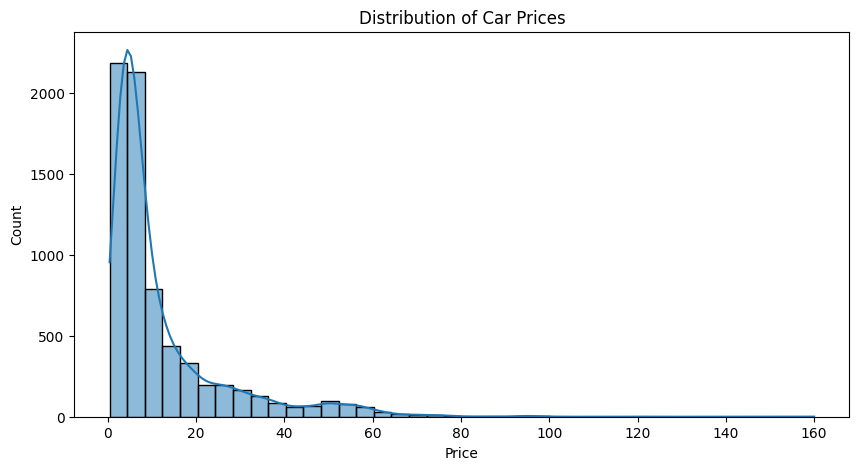

In [ ]:
# Price
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], kde = True, bins = 40)
plt.title('Distribution of Car Prices')
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

**Insight:**

1. The price distribution is right-skewed, indicating a higher number of lower-priced used cars.

2. Some extreme values (outliers) exist on the higher end, suggesting the presence of luxury vehicles.

3. This variable should be log-transformed or handled with care during modeling.

<ipython-input-28-0e3d54017d74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', order=sorted(df['Year'].unique()), palette="Blues_r")


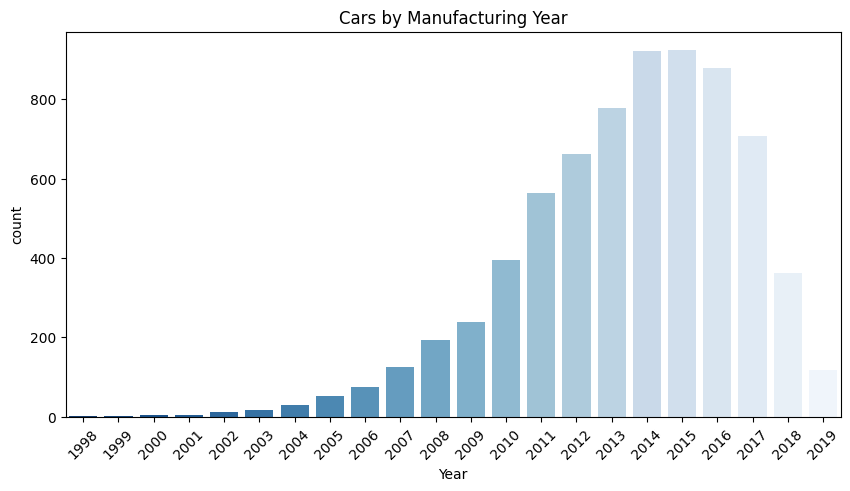

In [ ]:
# Year Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Year', order=sorted(df['Year'].unique()), palette="Blues_r")
plt.title("Cars by Manufacturing Year")
plt.xticks(rotation=45)
plt.show()


**Insight:**

1. Most cars are from 2010–2019, showing demand for relatively newer used cars.

2. Very few listings from before 2005, likely due to depreciation or scrapping policies.



<ipython-input-32-524db78c669d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fuel_Type', palette='Set2')


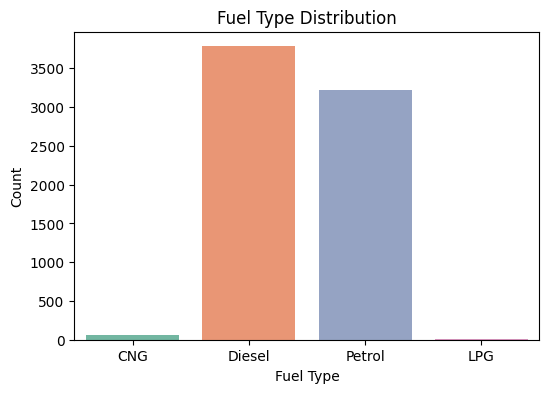

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Fuel_Type', palette='Set2')
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

**Insight:**

1. Diesel and Petrol dominate the market.

2. Very few electric or CNG cars, which may reflect the used car market trends in India.



<ipython-input-35-9d3aac137de1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Transmission', palette='pastel')


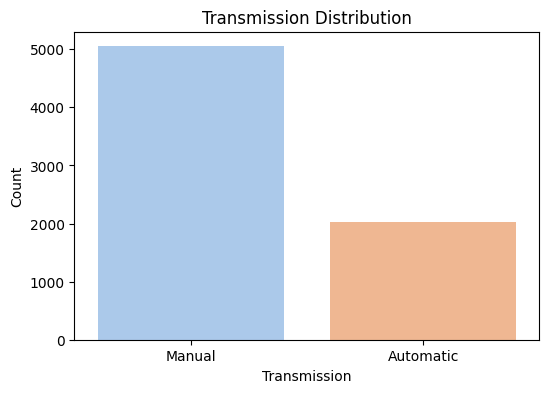

In [ ]:
# Transmission
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Transmission', palette='pastel')
plt.title("Transmission Distribution")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.show()

**Insight:**

1. Manual transmission cars are far more common in the used market.

2. Automatic cars, though increasing, are still in the minority.

<ipython-input-38-056e1e9ba880>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Owner_Type', palette='muted')


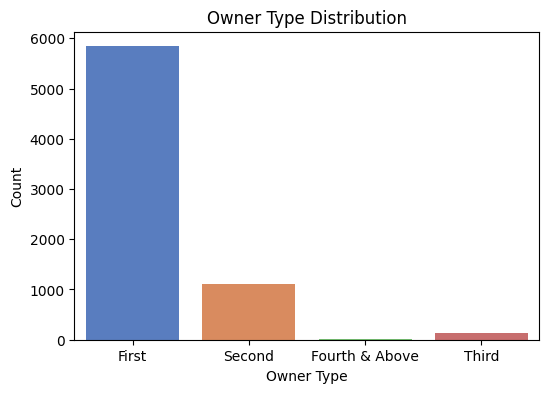

In [ ]:
plt.figure(figsize = (6, 4))
sns.countplot(data=df, x='Owner_Type', palette='muted')
plt.title("Owner Type Distribution")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.show()

**Insight:**

1. Majority of cars are First Owners, indicating better resale value and trust.

2. Few are from third/fourth owners — possibly harder to sell.

<ipython-input-43-ae5bc72abb98>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fuel_Type', order=df['Fuel_Type'].value_counts().index, palette='muted')


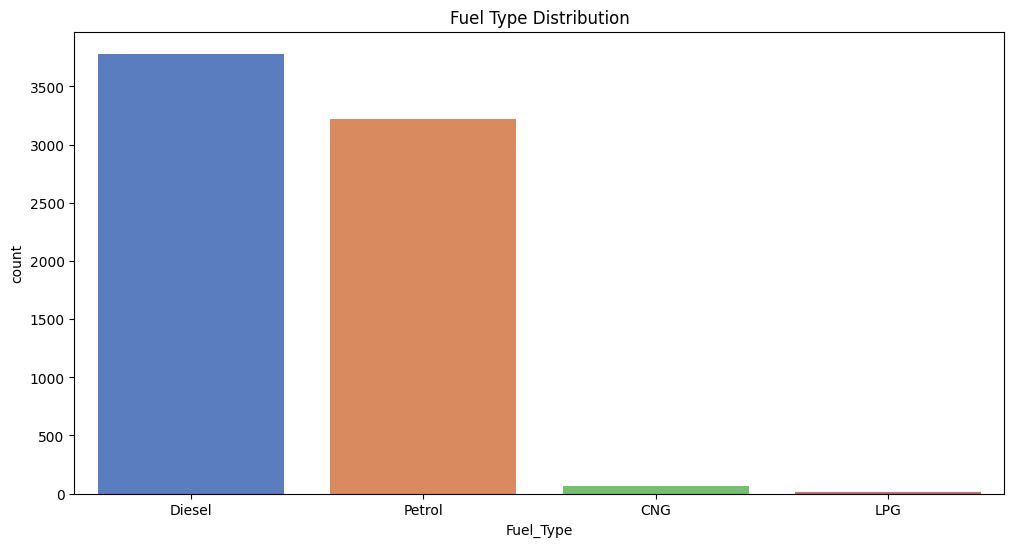

In [ ]:
# Categorical Variables Distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Fuel_Type', order=df['Fuel_Type'].value_counts().index, palette='muted')
plt.title('Fuel Type Distribution')
plt.show()

###**Bivariate Analysis**

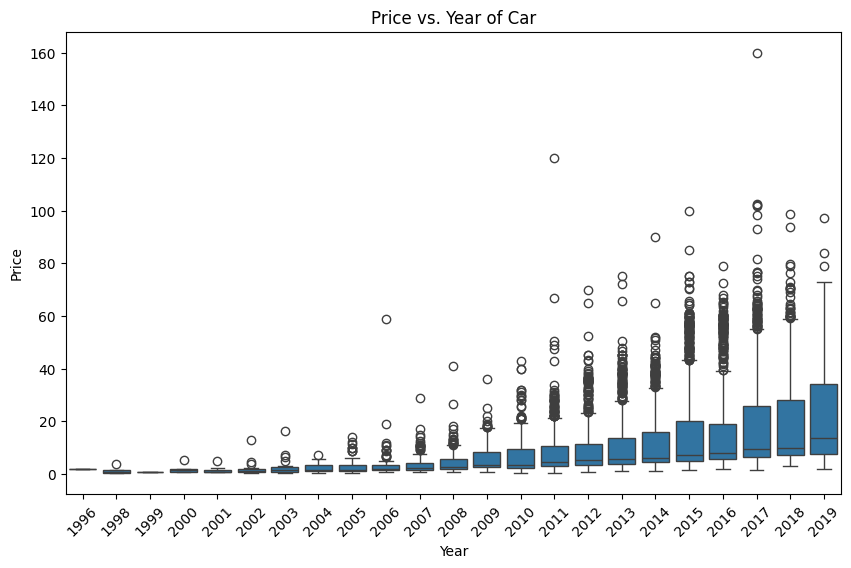

In [ ]:
# Price vs Fuel
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Year', y='Price')
plt.xticks(rotation=45)
plt.title('Price vs. Year of Car')
plt.show()

**Insight:**

1. Newer cars tend to have higher prices.

2. A few expensive outliers exist across several years.

<ipython-input-11-5751d10b4ee4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fuel_Type', y='Price', palette='Set2')


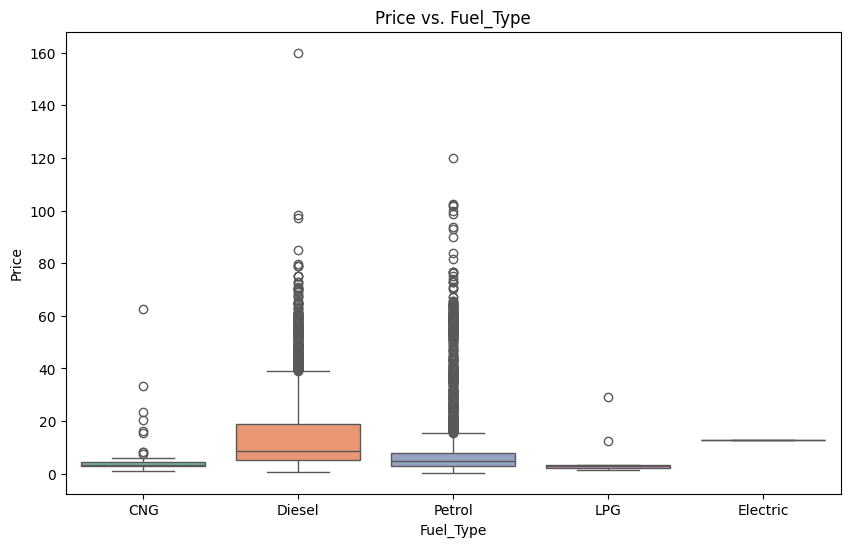

In [ ]:
# Price vs.  Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fuel_Type', y='Price', palette='Set2')
plt.title('Price vs. Fuel_Type')
plt.ylabel('Price')
plt.show()

**Insight:**

1. **Diesel** and **Petrol** are the most common types.

2. **Electric** and **hybrid variants** (if any) may be priced higher but are rare.

3. **Diesel** cars tend to have slightly higher median prices.

<ipython-input-12-4a9655e6f772>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Transmission', y='Price', palette='pastel')


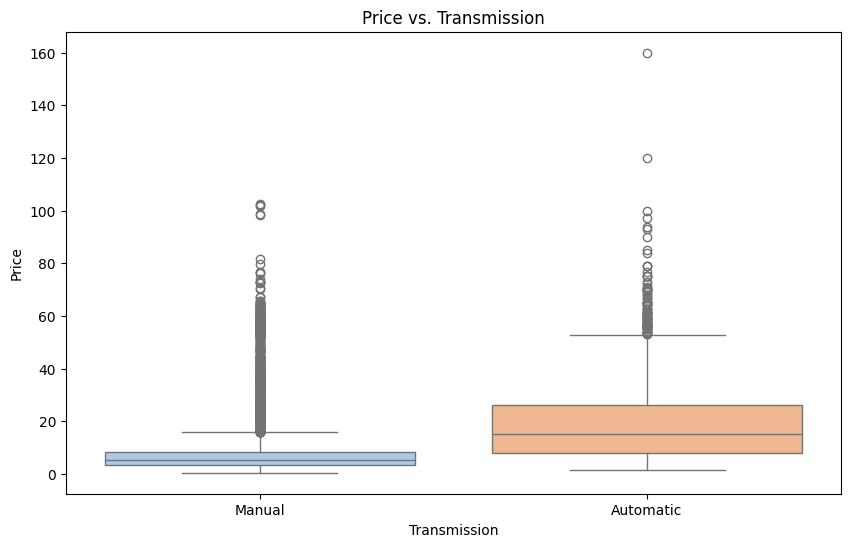

In [ ]:
# Price vs. Transmission
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Transmission', y='Price', palette='pastel')
plt.title('Price vs. Transmission')
plt.ylabel('Price')
plt.show()

**Insight:**

Automatic cars generally have a higher median price compared to manual cars.

<ipython-input-14-e461c76f7f2d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Owner_Type', y='Price', palette='pastel')


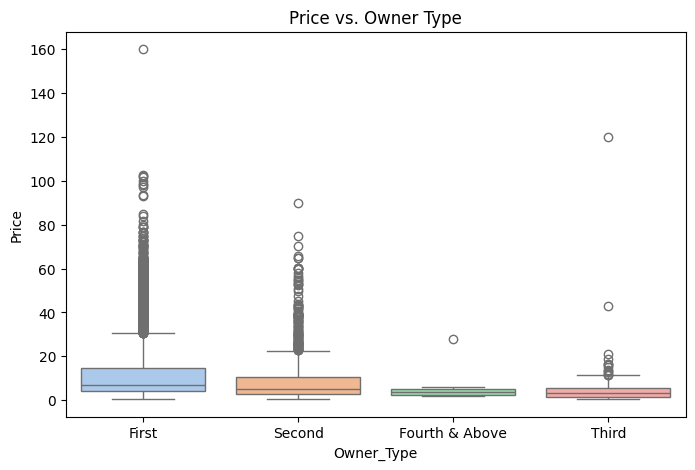

In [ ]:
#  Price vs. Owner Type
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Owner_Type', y='Price', palette='pastel')
plt.title('Price vs. Owner Type')
plt.show()


**Insight:**

1. First-owner cars command higher prices.

2. Prices drop significantly with second or third ownership.

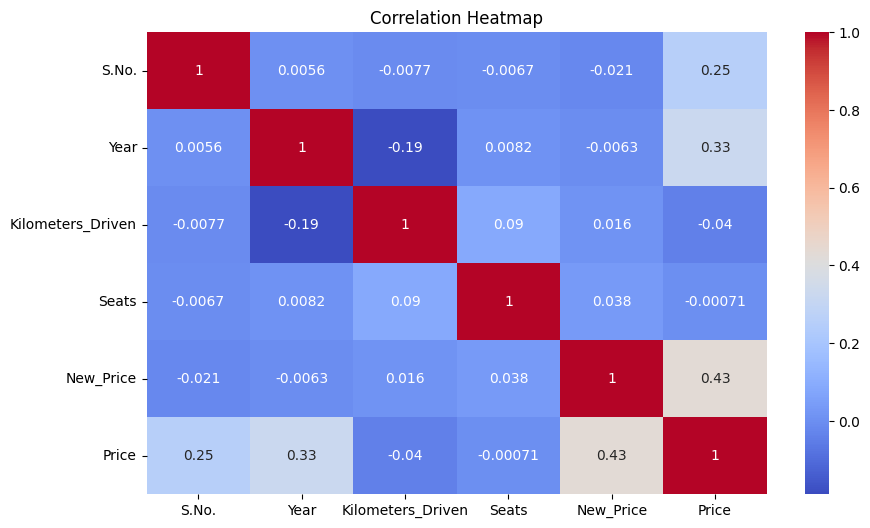

In [ ]:
# Correlation Heatmap (Numeric Features)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Insight:**

1. Price is negatively correlated with Kilometers_Driven.

2. Weak correlation with most other numeric features, suggesting multivariate modeling may be necessary.

###**Multivariate Analysis**

**Price by Year and Fuel Type**

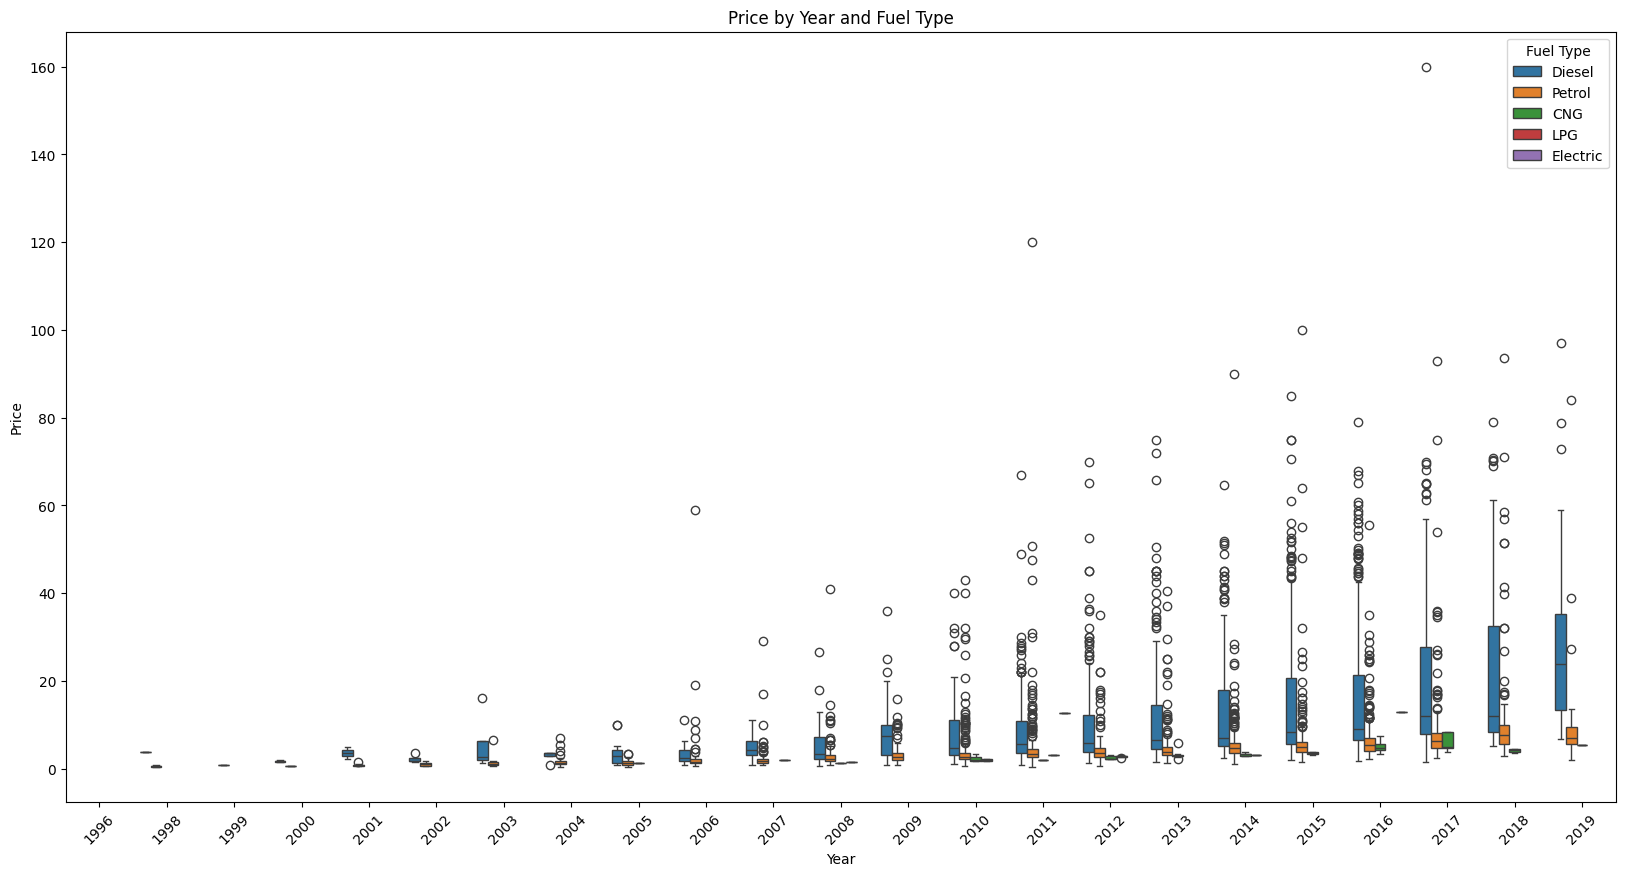

In [6]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x='Year', y='Price', hue='Fuel_Type')
plt.xticks(rotation=45)
plt.title('Price by Year and Fuel Type')
plt.legend(title='Fuel Type')
plt.show()

**Insight:**

1. Newer cars, regardless of fuel type, are priced higher.

2. Diesel vehicles often command higher prices in older models, but petrol catches up in newer ones.

**Price by Transmission and Fuel Type**

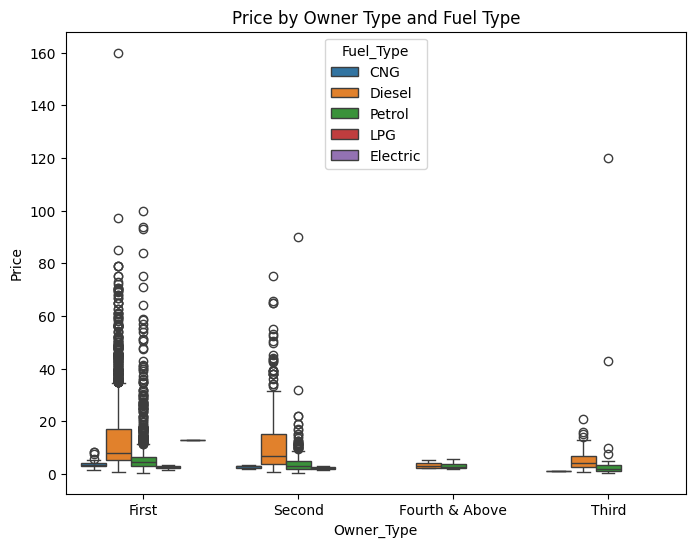

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Owner_Type', y='Price', hue='Fuel_Type')
plt.title('Price by Owner Type and Fuel Type')
plt.legend(title='Fuel_Type')
plt.show()

**Insight:**

1. Automatic transmissions are more expensive, especially for diesel variants.

2. Manual petrol cars are generally the cheapest.

**Pair Plot of Numerical Features**

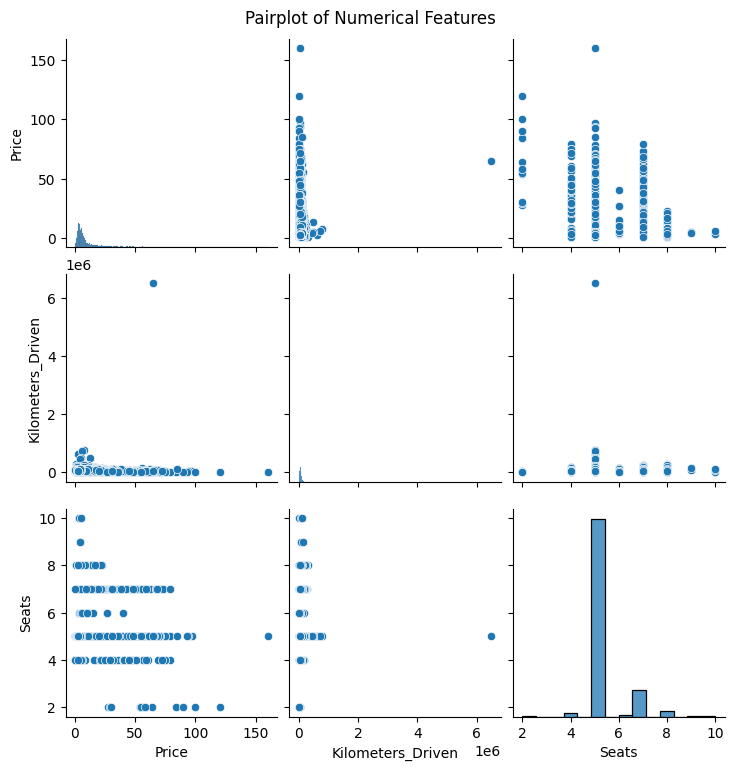

In [9]:
num_cols = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
sns.pairplot(df[num_cols].dropna())
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

**Insight:**

1. Negative linear trends visible between Price and Kilometers_Driven.


2. Relationships aren't always linear, implying complex interactions.

**Heatmap with Categorical Encoded Features**

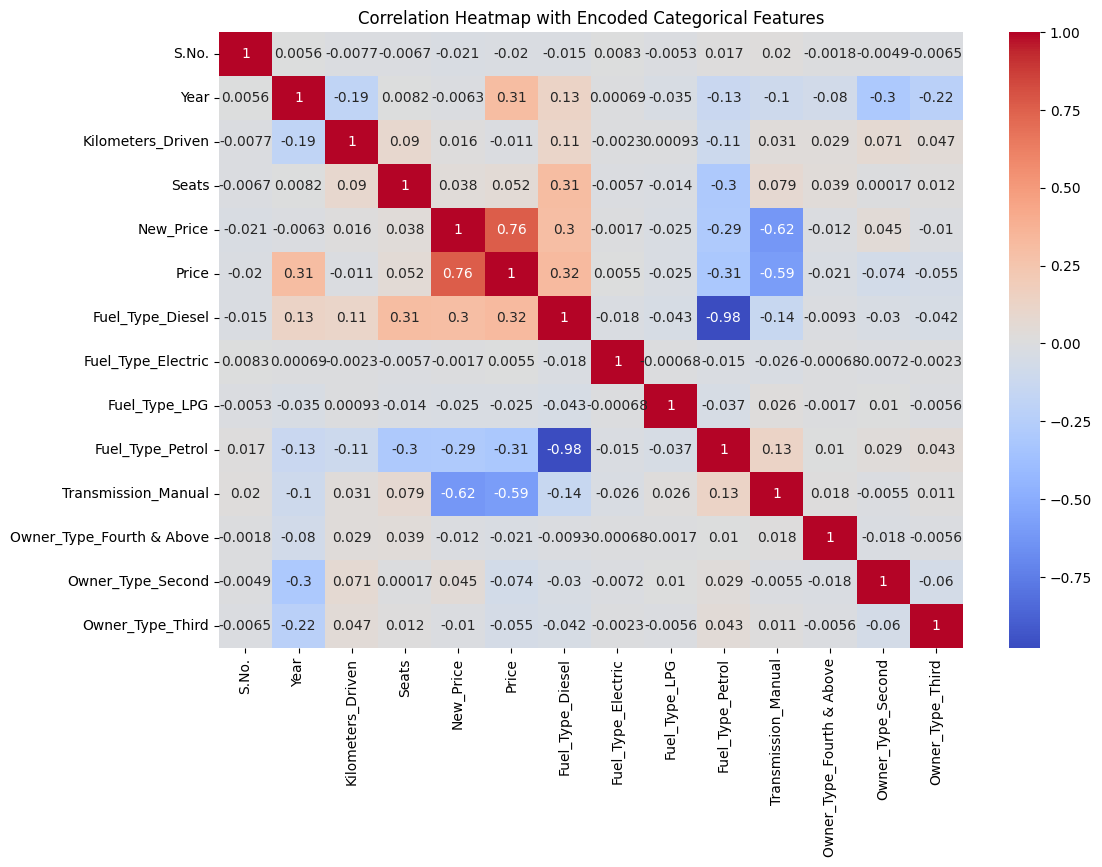

In [11]:
df_encoded = df.copy()
# Drop the 'Name' column as it's a string and not relevant for correlation calculation
df_encoded = df_encoded.drop('Name', axis=1)
df_encoded = pd.get_dummies(df_encoded, columns=['Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True)

plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(numeric_only=True), cmap='coolwarm', annot=True) # Added numeric_only=True for robustness
plt.title('Correlation Heatmap with Encoded Categorical Features')
plt.show()


**Insight:**

1. Power and Engine correlate moderately with Price.

2. Encoded variables like Transmission_Automatic also show mild positive correlation with Price.

**Feature Engineering**

In [4]:
df_model = df.copy()

# Drop irrelevant column
df_model.drop(columns=['S.No.'], inplace=True)

# Extract numeric values from string fields
def extract_number(text):
    try:
        return float(text.split()[0])
    except:
        return np.nan

df_model['Mileage'] = df_model['Mileage'].apply(extract_number)
df_model['Engine'] = df_model['Engine'].apply(extract_number)
df_model['Power'] = df_model['Power'].apply(extract_number)

# Drop rows with remaining missing values
df_model.dropna(inplace=True)

**Log Transformation & Encoding**

In [5]:
# Log-transform skewed numeric variables
df_model['price_log'] = np.log(df_model['Price'])
df_model['kilometers_driven_log'] = np.log(df_model['Kilometers_Driven'])

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
le = LabelEncoder()
for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Drop overly granular 'Name'
df_model.drop(columns=['Name'], inplace=True)


**Train-Test Split**

In [6]:
from sklearn.model_selection import train_test_split

# Feature selection
features = ['Year', 'Kilometers_Driven', 'kilometers_driven_log', 'Fuel_Type',
            'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Location']

X = df_model[features]
y_price = df_model['Price']
y_price_log = df_model['price_log']

# Train/test split
X_train, X_test, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.2, random_state=42)
_, _, y_train_log, y_test_log = train_test_split(X, y_price_log, test_size=0.2, random_state=42)


**Model Training and Evaluation**

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model 1: Predict actual Price
model_price = LinearRegression().fit(X_train, y_train_price)
pred_price = model_price.predict(X_test)

# Model 2: Predict log(Price)
model_log = LinearRegression().fit(X_train, y_train_log)
pred_log = model_log.predict(X_test)

# Metrics
metrics_price = {
    "RMSE": np.sqrt(mean_squared_error(y_test_price, pred_price)),
    "MAE": mean_absolute_error(y_test_price, pred_price),
    "R²": r2_score(y_test_price, pred_price)
}

metrics_log = {
    "RMSE": np.sqrt(mean_squared_error(y_test_log, pred_log)),
    "MAE": mean_absolute_error(y_test_log, pred_log),
    "R²": r2_score(y_test_log, pred_log)
}

print("Model 1 (Predicting Price):", metrics_price)
print("Model 2 (Predicting log(Price)):", metrics_log)


Model 1 (Predicting Price): {'RMSE': np.float64(5.18226895161098), 'MAE': 3.146732759149864, 'R²': 0.7440123940949688}
Model 2 (Predicting log(Price)): {'RMSE': np.float64(0.3047165965725601), 'MAE': 0.21969304655058813, 'R²': 0.8730994687653115}


#**Business Insights & Recommendation**

###**Final Model:**

**Model 2 (Log-Transformed Price) is chosen because:**

1. It performs better on all metrics.

2. Handles skewness and outliers effectively.

3. Produces more reliable predictions across different car segments.


**Actionable Insights:**

**Top Influencers of Price:**

 *   Engine size, power, mileage, and transmission type have the greatest impact on car price.

**Inventory Strategy:**

*   Avoid acquiring cars with high kilometers and low power—they depreciate faster.

**Dynamic Pricing:**

* Use model predictions to adjust prices based on car age, fuel type, and performance metrics.

**Marketing Focus:**

* Promote high-mileage, high-power vehicles as “performance-focused” to justify pricing.